In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/combined_data_EMAIL.csv')

In [4]:
df = data[:40000]
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [37]:
import re
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['process_text'] = df['text'].apply(preprocess_text)

In [6]:
from tensorflow.keras.preprocessing.text import tokenizer_from_json
with open('/content/drive/MyDrive/tokenizer.json') as f:
    loaded_tokenizer = tokenizer_from_json(f.read())

In [7]:
sequences = loaded_tokenizer.texts_to_sequences(df['process_text'])

In [8]:
max_length = 536
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

In [16]:
X_train[0].shape

(536,)

In [17]:
model = Sequential([
    Embedding(input_dim= 10000, output_dim=32, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [18]:
from tensorflow.keras.optimizers import SGD

In [19]:
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
    np.array(X_train), np.array(y_train),
    validation_data=(np.array(X_test), np.array(y_test)),
    epochs=15, batch_size=32
)

Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.5255 - loss: 0.6915 - val_accuracy: 0.5449 - val_loss: 0.6882
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.5549 - loss: 0.6867 - val_accuracy: 0.5554 - val_loss: 0.6834
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.5538 - loss: 0.6837 - val_accuracy: 0.5583 - val_loss: 0.6823
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.5603 - loss: 0.6810 - val_accuracy: 0.5591 - val_loss: 0.6825
Epoch 5/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.5639 - loss: 0.6802 - val_accuracy: 0.5631 - val_loss: 0.6770
Epoch 6/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.5698 - loss: 0.6773 - val_accuracy: 0.5623 - val_loss: 0.6787
Epoch 7/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.5582 - loss: 0.6810 - val_accuracy: 0.5487 - val_loss: 0.6850
Epoch 8/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.5615 -

In [23]:
# Extract metrics
accuracy = history.history['accuracy']       # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss


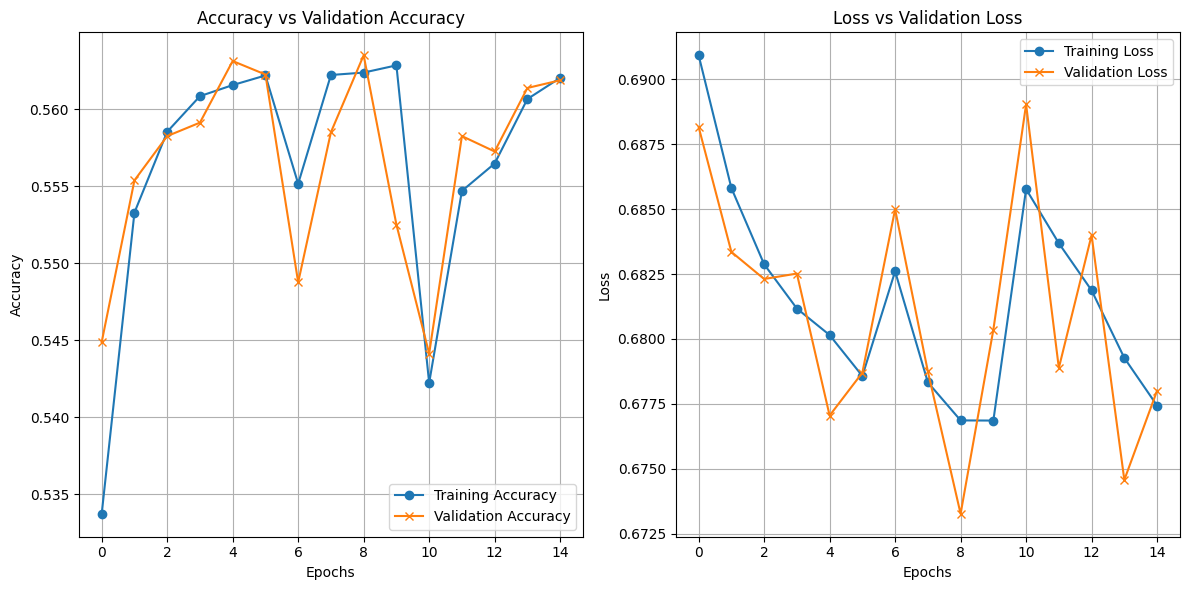

In [24]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='x')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='x')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


In [36]:
df = data[41000:50000]
df.shape

(9000, 2)

In [44]:
df

,label,text,process_text
41000,1,valiuzm\nxanvax\npapxil\nprouzac\nzolsoft\ncel...,valiuzm xanvax papxil prouzac zolsoft celetbre...
41001,0,author obnox date escapenumber escapenumber es...,author obnox date escapenumber escapenumber es...
41002,0,from paul lalli on jun escapenumber escapenumb...,from paul lalli on jun escapenumber escapenumb...
41003,0,hi i am using a dectalk express and was trying...,hi i am using a dectalk express and was trying...
41004,1,get the finest watch replicas we only sell pre...,get the finest watch replicas we only sell pre...
...,...,...,...
49995,0,on tue escapenumber jun escapenumber andy spie...,on tue escapenumber jun escapenumber andy spie...
49996,1,dear valued member its your therapists assis...,dear valued member it s your therapist s assis...
49997,1,he could not be intended and safe here is to i...,he could not be intended and safe here is to i...
49998,1,vip r e p l i c a w a t c h e s if you are loo...,vip r e p l i c a w a t c h e s if you are loo...


In [50]:
X_test = df['process_text']
y_test = df['label']

In [51]:
sample_sequences = loaded_tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sample_sequences, maxlen=536, padding='post', truncating='post')

# predictions = (model.predict(sample_padded) > 0.5).astype(int)
# for text, pred in zip(sample_texts, predictions):
#     label = "Spam" if pred == 1 else "Ham"
#     print(f"Text: {text} -> {label}")

In [52]:
X_test[0].shape

(536,)

In [48]:
X_test = np.expand_dims(X_test, axis=-1)  # Adds the feature dimension


In [55]:
predictions = (model.predict(X_test) > 0.5).astype(int)


282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [56]:
cm = confusion_matrix(y_test, predictions)
cm

array([[ 522, 3753],
       [ 182, 4543]])

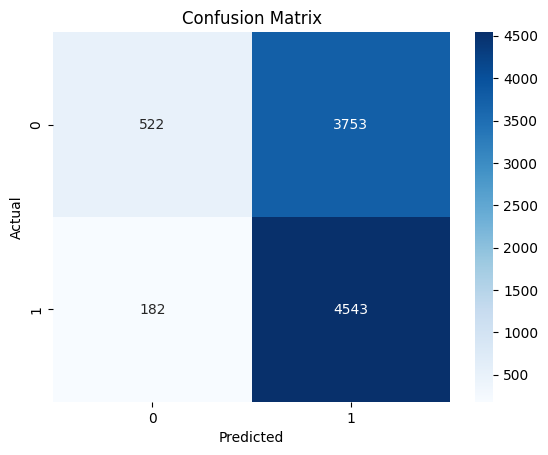

In [57]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
report = classification_report(y_test, predictions)
print(report)

print("F1_score: ", f1_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.12      0.21      4275
           1       0.55      0.96      0.70      4725

    accuracy                           0.56      9000
   macro avg       0.64      0.54      0.45      9000
weighted avg       0.64      0.56      0.47      9000

F1_score:  0.6977958682128869
Precision:  0.5476133076181292
Recall:  0.9614814814814815
